# Analysis of Local and Central DP-GMM

In this notebook we will compare our DP-GMM implementations.

## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os

# add src to path for easier local imports
sys.path.append(os.path.join(os.getcwd(), "src"))
from base_gmm import GMM
from ldp_gmm import LDPGMM
from cdp_gmm import CDPGMM

## Old Faithful Dataset

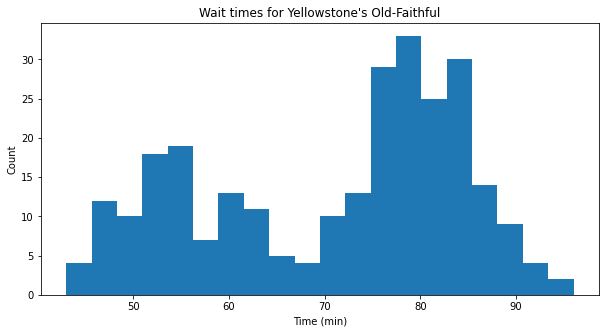

In [2]:
# read in data
df = pd.read_csv("data/old_faithful.csv")
wait_dat = df["waiting"].values.astype(int).reshape(-1, 1)

# plot histogram
plt.figure(figsize=(10, 5))
plt.hist(wait_dat, bins=20)
plt.title("Wait times for Yellowstone's Old-Faithful")
plt.xlabel("Time (min)")
plt.ylabel("Count")
plt.savefig("old_faithful.svg")
plt.show()

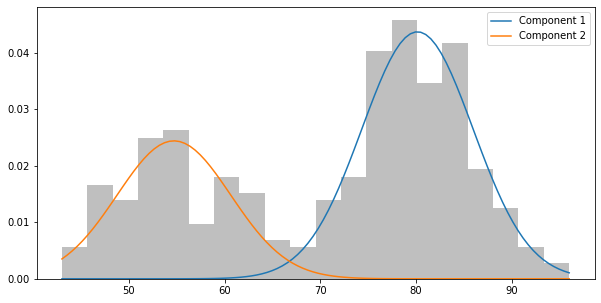

In [3]:
# create non-DP GMM object and fit to data
nondp_gmm = GMM(n_components=2).fit(wait_dat)
nondp_gmm.plot_mixture(wait_dat, bins=20)

In [4]:
# get non-DP GMM components
nondp_means = nondp_gmm.means_.flatten()
nondp_covs = nondp_gmm.covariances_.flatten()
nondp_weights = nondp_gmm.weights_.flatten()
nondp_comp1 = (nondp_means[0], nondp_covs[0], nondp_weights[0])
nondp_comp2 = (nondp_means[1], nondp_covs[1], nondp_weights[1])
print(f"True means: {nondp_means[0], nondp_means[1]}")
print(f"True covariances: {nondp_covs[0], nondp_covs[1]}")
print(f"True weights: {nondp_weights[0], nondp_weights[1]}")

True means: (80.14546556133249, 54.699842709202834)
True covariances: (33.79021579256459, 35.31764935665251)
True weights: (0.6365423321901911, 0.3634576678098091)


c:\Users\charl\OneDrive - Harvard University\Documents\Harvard\AY 22-2\CS208\Project\DP-GMM\src\cdp_gmm.py:95: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided.  This will "


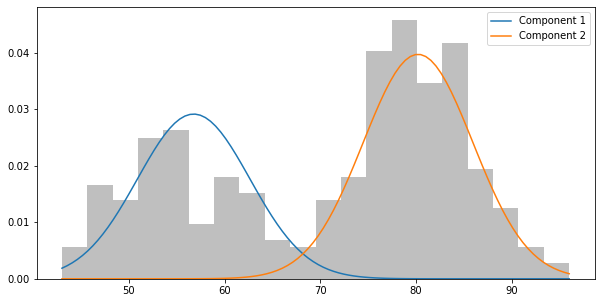

In [5]:
# create central-DP GMM object and fit to data
cdp_gmm = CDPGMM(n_components=2, epsilon=3).fit(wait_dat)
cdp_gmm.plot_mixture(wait_dat, bins=20)

In [6]:
# get locaL-DP GMM components
cdp_means = cdp_gmm.means_.flatten()
cdp_covs = cdp_gmm.covariances_.flatten()
cdp_weights = cdp_gmm.weights_.flatten()
cdp_comp1 = (cdp_means[0], cdp_covs[0], cdp_weights[0])
cdp_comp2 = (cdp_means[1], cdp_covs[1], cdp_weights[1])
print(f"CDP means: {cdp_means[0], cdp_means[1]}")
print(f"CDP covariances: {cdp_covs[0], cdp_covs[1]}")
print(f"CDP weights: {cdp_weights[0], cdp_weights[1]}")

CDP means: (56.765862021810065, 80.2065764211916)
CDP covariances: (34.50925613284904, 32.91631712785521)
CDP weights: (0.4290339701976579, 0.5709660298023421)


c:\Users\charl\OneDrive - Harvard University\Documents\Harvard\AY 22-2\CS208\Project\DP-GMM\src\ldp_gmm.py:84: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided.  This will "


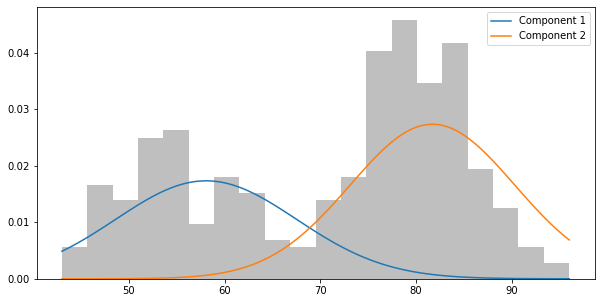

In [7]:
# create local-DP GMM object and fit to data
ldp_gmm = LDPGMM(n_components=2, epsilon=3).fit(wait_dat)
ldp_gmm.plot_mixture(wait_dat, bins=20)

In [8]:
# get locaL-DP GMM components
ldp_means = ldp_gmm.means_.flatten()
ldp_covs = ldp_gmm.covariances_.flatten()
ldp_weights = ldp_gmm.weights_.flatten()
ldp_comp1 = (ldp_means[0], ldp_covs[0], ldp_weights[0])
ldp_comp2 = (ldp_means[1], ldp_covs[1], ldp_weights[1])
print(f"LDP means: {ldp_means[0], ldp_means[1]}")
print(f"LDP covariances: {ldp_covs[0], ldp_covs[1]}")
print(f"LDP weights: {ldp_weights[0], ldp_weights[1]}")

LDP means: (58.06486932556468, 81.71057506485221)
LDP covariances: (89.3941896754611, 73.92951248919265)
LDP weights: (0.4107620461007363, 0.5892379538992643)


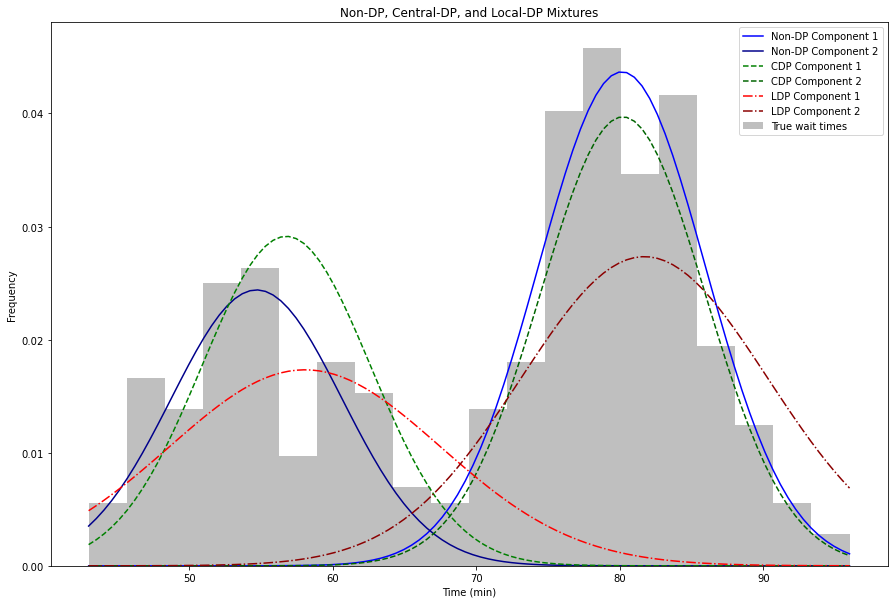

In [9]:
# Creating plot
x = np.linspace(wait_dat.min(), wait_dat.max(), 100)
plt.figure(figsize=(15, 10))
plt.hist(wait_dat, bins=20, density=True, color="gray", alpha=0.5, label="True wait times")
plt.plot(x, nondp_comp1[2]*sp.stats.norm(nondp_comp1[0], nondp_comp1[1]**0.5).pdf(x), color="blue", label="Non-DP Component 1")
plt.plot(x, nondp_comp2[2]*sp.stats.norm(nondp_comp2[0], nondp_comp2[1]**0.5).pdf(x), color="darkblue", label="Non-DP Component 2")
plt.plot(x, cdp_comp1[2]*sp.stats.norm(cdp_comp1[0], cdp_comp1[1]**0.5).pdf(x), color="green", label="CDP Component 1", linestyle="dashed")
plt.plot(x, cdp_comp2[2]*sp.stats.norm(cdp_comp2[0], cdp_comp2[1]**0.5).pdf(x), color="darkgreen", label="CDP Component 2", linestyle="dashed")
plt.plot(x, ldp_comp1[2]*sp.stats.norm(ldp_comp1[0], ldp_comp1[1]**0.5).pdf(x), color="red", label="LDP Component 1", linestyle="dashdot")
plt.plot(x, ldp_comp2[2]*sp.stats.norm(ldp_comp2[0], ldp_comp2[1]**0.5).pdf(x), color="darkred", label="LDP Component 2", linestyle="dashdot")
plt.title("Non-DP, Central-DP, and Local-DP Mixtures")
plt.xlabel("Time (min)")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("faithful_comparison.svg")
plt.show()

## Comparing mixture performance

To compare the performance of the central model versus that of the local model over various samples sizes, we'll run the following simulation. We'll first build a distribution with three Gaussian kernels and the following parameters.
\begin{align*}
    \pi &= \left[ 0.15, 0.35, 0.5 \right] \\
    \mu &= \left[ 17, 30, 50 \right] \\
    \sigma &= \left[ 9, 16, 25 \right]
\end{align*}
Then, for each sample size $n$, we'll sample this distribution $n$ times to build our dataset. We'll use this dataset to build a number of GMMs using both Central- and Local-DP. To evaluate the performance of the DP-GMMs, we'll compute the MSE of each component's mean, covariance, and weight. We'll first define some helper functions to help with this.

In [10]:
def generate_dataset(n, pis, mus, sigmas):
    """Generate dataset from distribution.

    Parameters
    ----------
    n : int
        Size of dataset.
    pis : array_like
        Component weights.
    mus : array_like
        Component means.
    sigmas : array_like
        Component (co)variances.

    Returns
    -------
    ndarray
        Generated dataset.
    """
    assert len(pis) == len(mus) == len(sigmas), "Parameters don't match"
    K = len(pis)

    # assign n points to component by weight
    comp_ids = np.random.choice(np.arange(K), size=n, p=pis)

    # generate datapoints by sampling component
    dat = np.array([np.random.normal(mus[i], sigmas[i]**0.5, size=1)[0] for i in comp_ids])
    return dat.astype(int).reshape(-1, 1)


def get_gmm_info(data, n_components, epsilon=1, privacy=None):
    """Get component means, covariances, and weights from GMM.

    Parameters
    ----------
    data : array_like
        Dataset to fit GMM.
    n_components : int
        Number of components.
    epsilon : int, optional
        Privacy parameter, by default 1.
    privacy : {None, "local", "central"}, str, optional
        Privacy type, by default None.

    Returns
    -------
    array_like
        Matrix containing means, covariances, and weights of
        each component.

    Raises
    ------
    ValueError
        If `privacy` type is invalid.
    """
    # create GMM based on privacy type
    bounds = (np.min(data), np.max(data))
    if not privacy:
        model = GMM(n_components=n_components).fit(data)
    elif privacy == "local":
        model = LDPGMM(n_components=n_components, epsilon=epsilon).fit(data, bounds=bounds)
    elif privacy == "central":
        model = CDPGMM(n_components=n_components, epsilon=epsilon).fit(data, bounds=bounds)
    else:
        raise ValueError(f"Invalid privacy type {privacy}")

    # get component info
    model_means = model.means_.flatten()
    model_covariances = model.covariances_.flatten()
    model_weights = model.weights_.flatten()

    # store component info
    comp_info = np.zeros((n_components, 3))
    for i in range(n_components):
        comp_info[i, :] = [model_means[i], model_covariances[i], model_weights[i]]
    
    # sort by component means
    sort_inds = np.argsort(comp_info[:, 0])
    comp_info = comp_info[sort_inds, :]
    return comp_info


def calculate_rmse(true, pred):
    """Calculate root mean-squared error (RMSE) of prediction
    array.

    Parameters
    ----------
    true : array_like
        True values.
    pred : array_like
        Predicted values.

    Returns
    -------
    float
        Mean-squared error (MSE).
    """
    if not isinstance(true, np.ndarray):
        true = np.array(true)
    if not isinstance(pred, np.ndarray):
        pred = np.array(pred)
    return np.sqrt(np.mean((true - pred)**2))

In [11]:
# simulation parameters
samples = 30    # number of sample sizes to test
components = 3  # number of distributions per sample
epsilon = 3     # privacy parameter
iters = 20      # times to test each sample size
min_size = 2
max_size = 4

# distribution parameters
pis = [0.15, 0.35, 0.5]
mus = [17, 30, 50]
sigmas = [9, 16, 25]

# create array of sample sizes
ns = np.logspace(min_size, max_size, samples).astype(int)

# create matrices for storing RMSEs
base_rmse = [np.zeros((samples, 3)) for _ in range(components)]
cdp_rmse = [np.zeros((samples, 3)) for _ in range(components)]
ldp_rmse = [np.zeros((samples, 3)) for _ in range(components)]

# run simulation
for i, n in enumerate(ns):
    # get dataset
    X = generate_dataset(n, pis, mus, sigmas)

    # empty arrays to store component info
    base_pis = np.zeros((iters, components))
    base_mus = np.zeros((iters, components))
    base_sigmas = np.zeros((iters, components))
    cdp_pis = np.zeros((iters, components))
    cdp_mus = np.zeros((iters, components))
    cdp_sigmas = np.zeros((iters, components))
    ldp_pis = np.zeros((iters, components))
    ldp_mus = np.zeros((iters, components))
    ldp_sigmas = np.zeros((iters, components))
    for j in range(iters):
        # make GMMS
        base = get_gmm_info(X, components)
        cdp = get_gmm_info(X, components, epsilon, "central")
        ldp = get_gmm_info(X, components, epsilon, "local")

        # store component info
        for k in range(components):
            base_mus[j, k] = base[k, 0]
            base_sigmas[j, k] = base[k, 1]
            base_pis[j, k] = base[k, 2]
            cdp_mus[j, k] = cdp[k, 0]
            cdp_sigmas[j, k] = cdp[k, 1]
            cdp_pis[j, k] = cdp[k, 2]
            ldp_mus[j, k] = ldp[k, 0]
            ldp_sigmas[j, k] = ldp[k, 1]
            ldp_pis[j, k] = ldp[k, 2]

    # calculate RMSE
    for k in range(components):
        # make vector of true component info
        true_comp_mus = mus[k] * np.ones(iters)
        true_comp_sigmas = sigmas[k] * np.ones(iters)
        true_comp_pis = pis[k] * np.ones(iters)

        # calculate and store RMSE
        base_rmse[k][i, :] = [
            calculate_rmse(true_comp_mus, base_mus[:, k]),
            calculate_rmse(true_comp_sigmas, base_sigmas[:, k]),
            calculate_rmse(true_comp_pis, base_pis[:, k])
        ]
        cdp_rmse[k][i, :] = [
            calculate_rmse(true_comp_mus, cdp_mus[:, k]),
            calculate_rmse(true_comp_sigmas, cdp_sigmas[:, k]),
            calculate_rmse(true_comp_pis, cdp_pis[:, k])
        ]
        ldp_rmse[k][i, :] = [
            calculate_rmse(true_comp_mus, ldp_mus[:, k]),
            calculate_rmse(true_comp_sigmas, ldp_sigmas[:, k]),
            calculate_rmse(true_comp_pis, ldp_pis[:, k])
        ]
    print(f"Iteration {i + 1} complete")

# average RMSEs across components
base_rmse_avgs = np.array(base_rmse).mean(axis=0)
cdp_rmse_avgs = np.array(cdp_rmse).mean(axis=0)
ldp_rmse_avgs = np.array(ldp_rmse).mean(axis=0)

Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
Iteration 10 complete
Iteration 11 complete
Iteration 12 complete
Iteration 13 complete
Iteration 14 complete
Iteration 15 complete
Iteration 16 complete
Iteration 17 complete
Iteration 18 complete
Iteration 19 complete
Iteration 20 complete
Iteration 21 complete
Iteration 22 complete
Iteration 23 complete
Iteration 24 complete
Iteration 25 complete
Iteration 26 complete
Iteration 27 complete
Iteration 28 complete
Iteration 29 complete
Iteration 30 complete


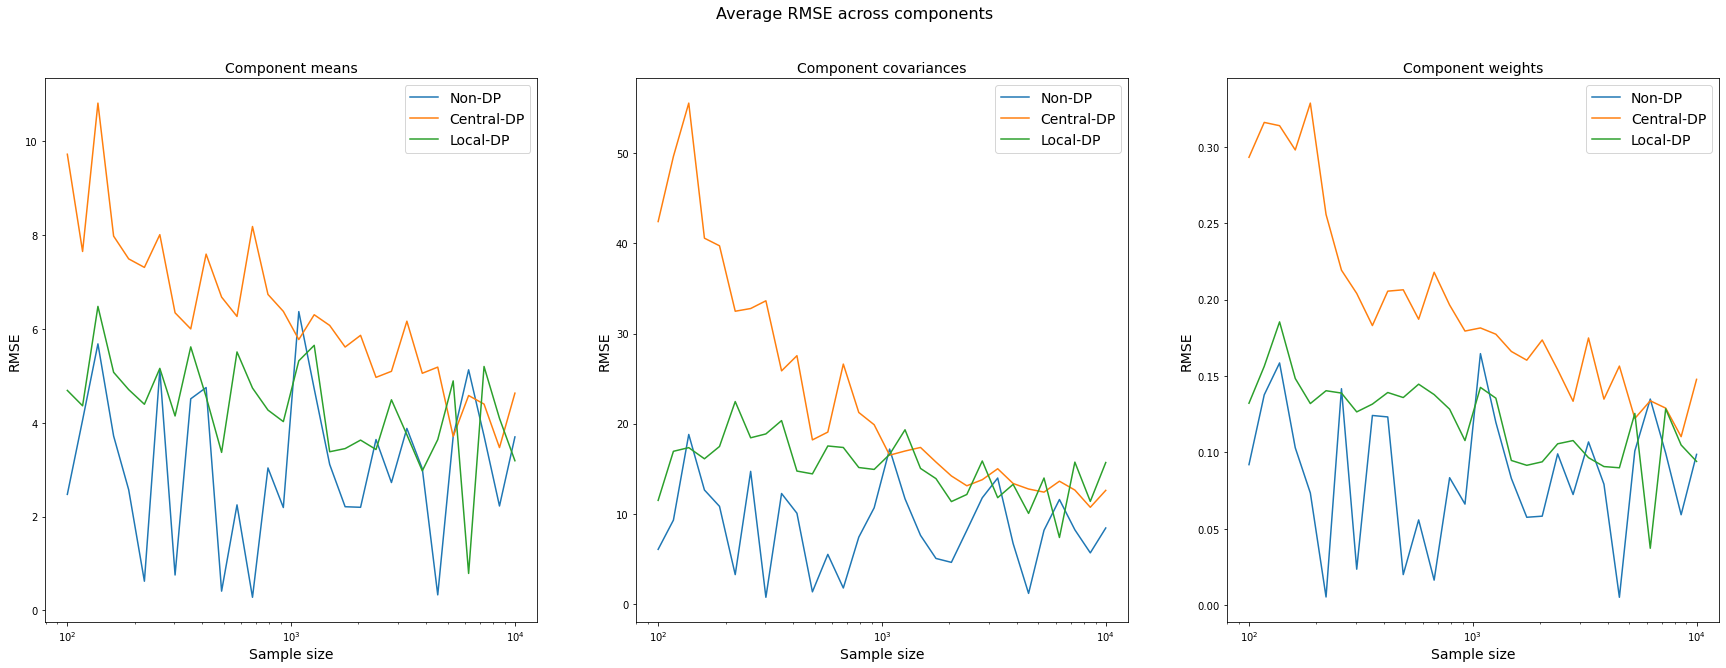

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

# plot average RMSEs
axes_titles = [
    "Component means",
    "Component covariances",
    "Component weights"
]
for i in range(3):
    ax[i].plot(ns, base_rmse_avgs[:, i], label="Non-DP")
    ax[i].plot(ns, cdp_rmse_avgs[:, i], label="Central-DP")
    ax[i].plot(ns, ldp_rmse_avgs[:, i], label="Local-DP")
    ax[i].set_xscale("log")
    ax[i].legend(fontsize=14)
    ax[i].set_title(axes_titles[i], fontsize=14)
    ax[i].set_xlabel("Sample size", fontsize=14)
    ax[i].set_ylabel("RMSE", fontsize=14)
plt.suptitle("Average RMSE across components", fontsize=16)
plt.savefig("performance.svg")
plt.show()